In [7]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from rnn_model import RNNModel
from time_series_dataset import TimeSeriesDataset
from input_data import InputData
from trainer import Trainer
import numpy as np

In [8]:
data_path = "../../data/trusted/currency_exchange.csv"
scaler = MinMaxScaler()
sequence_length = 8
train_size_proportion = 0.8

In [9]:
input_data = InputData(
    data_path=data_path,
    sequence_length=sequence_length,
    train_size_proportion=train_size_proportion,
    scaler=scaler,
)

In [10]:
X_train, X_test, y_train, y_test = input_data.create_training_and_test_sets()

In [11]:
# Hyperparameters
input_size = 1
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 200
batch_size = 10
dropout = 10

In [12]:
# Create data loaders
train_dataset = TimeSeriesDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = RNNModel(input_size, hidden_size, output_size, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trainer = Trainer(
    num_epochs=num_epochs,
    optimizer=optimizer,
    criterion=criterion,
    model=model,
    train_loader=train_loader,
    scaler=scaler,
)
trainer.train()

Epoch [1/200], Loss: 0.0853
Epoch [2/200], Loss: 0.062
Epoch [3/200], Loss: 0.0115
Epoch [4/200], Loss: 0.0055
Epoch [5/200], Loss: 0.0052
Epoch [6/200], Loss: 0.0045
Epoch [7/200], Loss: 0.0022
Epoch [8/200], Loss: 0.0123
Epoch [9/200], Loss: 0.0076
Epoch [10/200], Loss: 0.0038
Epoch [11/200], Loss: 0.0024
Epoch [12/200], Loss: 0.0046
Epoch [13/200], Loss: 0.0071
Epoch [14/200], Loss: 0.0041
Epoch [15/200], Loss: 0.007
Epoch [16/200], Loss: 0.0039
Epoch [17/200], Loss: 0.0043
Epoch [18/200], Loss: 0.0037
Epoch [19/200], Loss: 0.0033
Epoch [20/200], Loss: 0.0038
Epoch [21/200], Loss: 0.0025
Epoch [22/200], Loss: 0.0088
Epoch [23/200], Loss: 0.0049
Epoch [24/200], Loss: 0.0019
Epoch [25/200], Loss: 0.0025
Epoch [26/200], Loss: 0.0017
Epoch [27/200], Loss: 0.0023
Epoch [28/200], Loss: 0.0013
Epoch [29/200], Loss: 0.004
Epoch [30/200], Loss: 0.0007
Epoch [31/200], Loss: 0.0011
Epoch [32/200], Loss: 0.0015
Epoch [33/200], Loss: 0.0025
Epoch [34/200], Loss: 0.0004
Epoch [35/200], Loss: 0.00

## Evaluación sobre el conjunto de datos de prueba


In [13]:
result = trainer.evaluate(X_test, y_test)
y_pred = result["y_pred"]
y_test = result["y_test"]

Root Mean Squared Error (RMSE): 0.012751031061403626
Mean Absolute Error (MAE): 0.01
Mean Absolute Percentage Error (MAPE): 0.58%


## Gráficas de los valores predichos vs reales


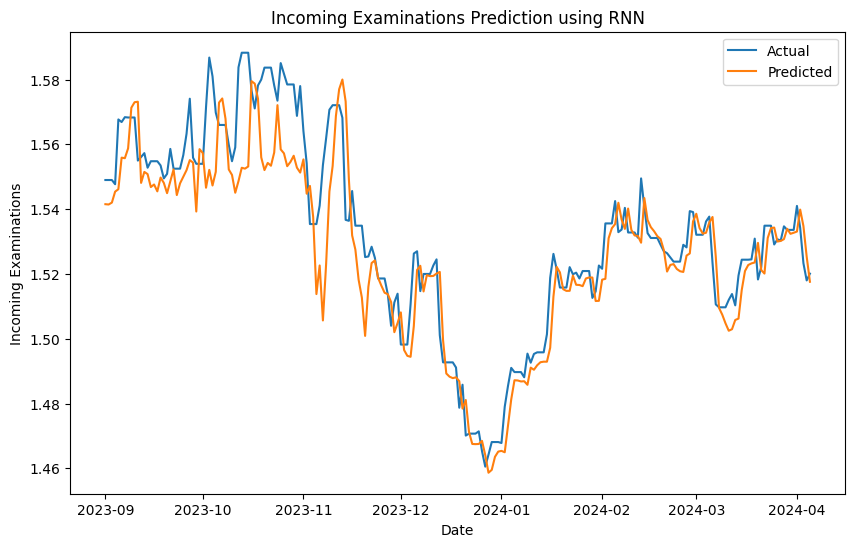

In [14]:
# Visualize predictions against actual data
df = input_data.df
train_size = input_data.train_size
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size + sequence_length :], y_test, label="Actual")
plt.plot(df.index[train_size + sequence_length :], y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Incoming Examinations")
plt.title("Incoming Examinations Prediction using RNN")
plt.legend()
plt.show()

In [15]:
y_train_model = trainer.model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy()
y_total_pred = np.append(y_train_model, y_pred)
y_total_actual = np.append(y_train, y_test)

In [16]:
len(y_total_pred)

1088

In [17]:
len(y_total_actual)

1088

In [18]:
len(df.index)

1096

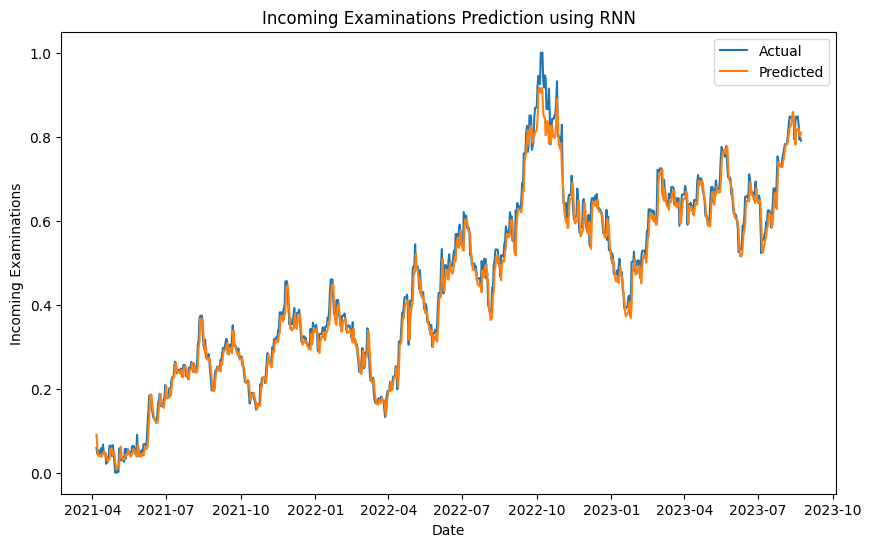

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], y_train, label="Actual")
plt.plot(df.index[:train_size], y_train_model, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Incoming Examinations")
plt.title("Incoming Examinations Prediction using RNN")
plt.legend()
plt.show()